In [20]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib as mpl

import datetime
import matplotlib.pyplot as plt
from IPython.core.debugger import Pdb
from matplotlib.finance import candlestick2_ohlc, candlestick_ohlc

mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['font.serif'] = ['SimHei']
%matplotlib inline

def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

pdb = Pdb()

#### 定义相关的参数

In [21]:
DATA_PATH = 'e:/cs.csv'

# LSTM中隐藏节点的个数
HIDDEN_SIZE = 30
# LSTM的层数
NUM_LAYERS = 2

#　循环神经网络的截断长度
TIMESTEPS = 10
# 训练轮数
TRAING_STEPS = 10000
TRAIN_BATCH_SIZE = 30

LEARNING_RATE = 1.0


#### 读取CS商品数据

In [22]:
data = pd.read_csv(DATA_PATH)

In [23]:
data.head()

,dataTime,instrumentID,openPrice,highestPrice,lowestPrice,closePrice,openInterest,volume,turnover,openVolume,openAmount
0,20141219 09:05:00,cs0000,2750,2845,2750,2798,0,7798,5156,0,0
1,20141219 09:10:00,cs0000,2798,2811,2798,2805,0,2884,5886,0,0
2,20141219 09:15:00,cs0000,2805,2841,2804,2836,0,4936,6548,0,0
3,20141219 09:20:00,cs0000,2835,2836,2812,2827,0,3014,6826,0,0
4,20141219 09:25:00,cs0000,2827,2830,2817,2820,0,1442,7150,0,0


#### 删除全零列及商品类别

In [24]:
data.drop(['instrumentID', "openInterest", 'openVolume', 'openAmount'], axis=1, inplace=True)
data.head()

,dataTime,openPrice,highestPrice,lowestPrice,closePrice,volume,turnover
0,20141219 09:05:00,2750,2845,2750,2798,7798,5156
1,20141219 09:10:00,2798,2811,2798,2805,2884,5886
2,20141219 09:15:00,2805,2841,2804,2836,4936,6548
3,20141219 09:20:00,2835,2836,2812,2827,3014,6826
4,20141219 09:25:00,2827,2830,2817,2820,1442,7150


#### 将时间转换为每日积秒,作为特征列

In [25]:
def stt(x):
    return datetime.datetime.strptime(x, '%Y%m%d %H:%M:%S')


data.dataTime = data.dataTime.apply(
    lambda x: (stt(x) - stt(x).replace(hour=0, minute=0, second=0, microsecond=0)).total_seconds()).astype(int)
seq = data.copy()


In [26]:
seq.head()

,dataTime,openPrice,highestPrice,lowestPrice,closePrice,volume,turnover
0,32700,2750,2845,2750,2798,7798,5156
1,33000,2798,2811,2798,2805,2884,5886
2,33300,2805,2841,2804,2836,4936,6548
3,33600,2835,2836,2812,2827,3014,6826
4,33900,2827,2830,2817,2820,1442,7150


In [27]:
quotes = seq.get(['dataTime', 'openPrice', 'closePrice', 'highestPrice', 'lowestPrice']).astype(float)
quotes.head()

,dataTime,openPrice,closePrice,highestPrice,lowestPrice
0,32700.0,2750.0,2798.0,2845.0,2750.0
1,33000.0,2798.0,2805.0,2811.0,2798.0
2,33300.0,2805.0,2836.0,2841.0,2804.0
3,33600.0,2835.0,2827.0,2836.0,2812.0
4,33900.0,2827.0,2820.0,2830.0,2817.0


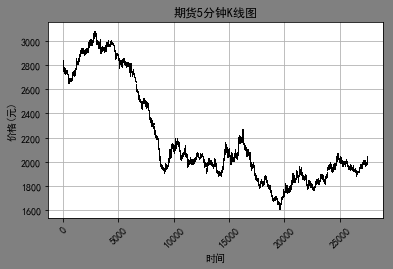

In [28]:
# 创建一个子图
fig, ax = plt.subplots(facecolor=(0.5, 0.5, 0.5))
fig.subplots_adjust(bottom=0.2)

# 设置X轴刻度为日期时间
# ax.xaxis_date()

# X轴高强度文字倾斜45度
plt.xticks(rotation=45)
plt.title('期货5分钟K线图')
plt.xlabel('时间')
plt.ylabel('价格(元)')
candlestick2_ohlc(ax, seq.openPrice, seq.highestPrice, seq.lowestPrice, seq.closePrice, width=1.2, colorup='r', colordown='green')
plt.grid(True)

#### 生成数据

In [29]:
def generate_data(seq):
    
    pass

#### 定义多层LSTM神经网络结构

In [31]:
reset_graph()
n_neurons = 150
n_steps = 24
n_inputs = 7
n_outputs = 1
n_layers = 3

learning_rate = 0.001

X = tf.placeholder(tf.float32, [ None, n_steps, n_inputs])
y = tf.placeholder(tf.int32, [None])

lstm_cells = [tf.contrib.rnn.BasicLSTMCell(num_units=n_neurons) for layer in range(n_layers)]
multi_cell = tf.contrib.rnn.MultiRNNCell(lstm_cells)
cell = tf.contrib.rnn.OutputProjectionWrapper(multi_cell, output_size=n_outputs)
outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)
loss = tf.reduce_mean(tf.square(outputs - y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)
init = tf.global_variables_initializer()

In [32]:
with tf.Session() as sess:
    init.run()
    for iteration in n_iterations:
        outputs_val, states_val = sess.run([outputs, states], feed_dict={X: X_batch})

NameError: name 'X_batch' is not defined